# Netflix Dataset EDA

In [1]:
# import libraries
import pandas as pd
import numpy as np

# read in data
df_netflix = pd.read_csv('data/netflix_titles.csv')

In [2]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Check for Duplicate/ NULL Values

In [3]:
df_netflix.duplicated().sum()

0

In [4]:
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Clean Data

In [6]:
df_netflix.dropna(subset=['date_added'], inplace=True) # drop some null values
df_netflix.dropna(subset=['rating'], inplace=True)
# fill unknown director and cast with empty str
df_netflix['director'] = df_netflix['director'].fillna('unknown')
df_netflix['cast'] = df_netflix['cast'].fillna('unknown')
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8793 non-null   object
 1   type          8793 non-null   object
 2   title         8793 non-null   object
 3   director      8793 non-null   object
 4   cast          8793 non-null   object
 5   country       7964 non-null   object
 6   date_added    8793 non-null   object
 7   release_year  8793 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8793 non-null   object
 11  description   8793 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.0+ KB


In [7]:
# fill the country and date_added with the mode because there is still some null values
df_netflix['country'] = df_netflix['country'].fillna('unknown')
df_netflix['date_added'] = df_netflix['date_added'].fillna(df_netflix['date_added'].mode()[0])
df_netflix['duration'] = df_netflix['duration'].fillna(df_netflix['duration'].mode()[0])

In [8]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8793 non-null   object
 1   type          8793 non-null   object
 2   title         8793 non-null   object
 3   director      8793 non-null   object
 4   cast          8793 non-null   object
 5   country       8793 non-null   object
 6   date_added    8793 non-null   object
 7   release_year  8793 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8793 non-null   object
 10  listed_in     8793 non-null   object
 11  description   8793 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.0+ KB


In [9]:
df_netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

## Need to remove bad values from rating col

In [10]:
# define function to clean rating col
def clean_rating(string):
    if 'min' in string:
        return ''
    return string

In [11]:
df_netflix['rating'] = df_netflix['rating'].apply(clean_rating)
df_netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

## Turn Duration into integer for visualizations

In [12]:
def new_duration(string):
    return int(string.split()[0])

In [13]:
df_netflix['duration'] = df_netflix['duration'].apply(new_duration)
df_netflix['duration'].head()

0    90
1     2
2     1
3     1
4     2
Name: duration, dtype: int64

In [14]:
df_netflix_shows = df_netflix[df_netflix['type'] == 'TV Show']
df_netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",unknown,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [15]:
df_netflix_movies = df_netflix[df_netflix['type'] == 'Movie']
df_netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [16]:
df_netflix.to_csv('cleaned_data/netflix_data_clean.csv')

## Visualizations

In [17]:
print('Correlation between release year and duration (Movies):', df_netflix_movies['release_year'].corr(df_netflix_movies['duration']))
df_netflix_movies.describe()

Correlation between release year and duration (Movies): -0.20578693405128579


,release_year,duration
count,6129.000000,6129.000000
mean,2013.120574,99.536629
std,9.679592,28.360269
min,1942.000000,1.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [18]:
print('Correlation between release year and duration (shows):', df_netflix_shows['release_year'].corr(df_netflix_shows['duration']))
df_netflix_shows.describe()

Correlation between release year and duration (shows): -0.08158550671233288


,release_year,duration
count,2664.000000,2664.000000
mean,2016.627628,1.751877
std,5.735194,1.550622
min,1925.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,17.000000


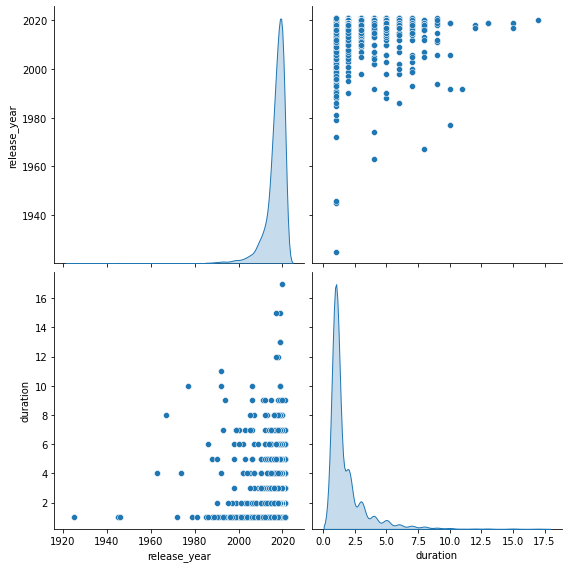

In [19]:
# initial distribution visualizations
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=df_netflix_shows, diag_kind='kde', height=4, aspect=1)

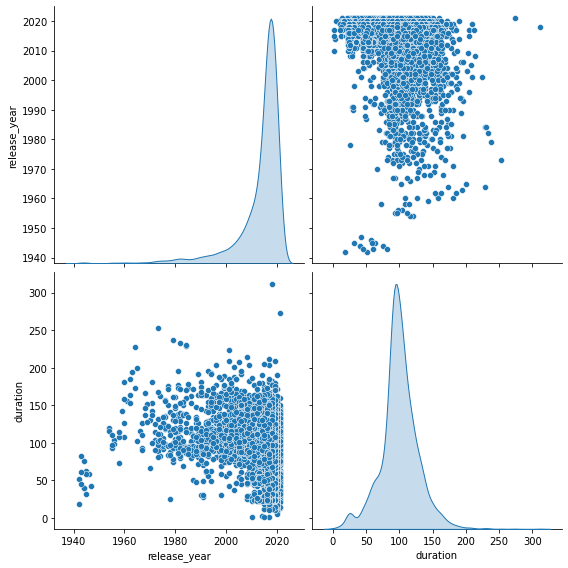

In [20]:
sns.pairplot(data=df_netflix_movies, diag_kind='kde', height=4, aspect=1)

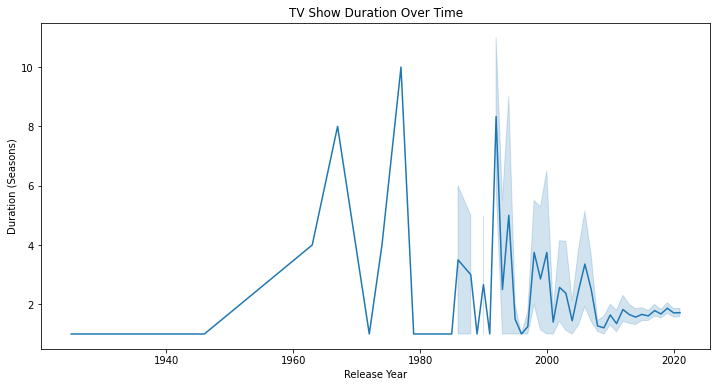

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_netflix_shows, x='release_year', y='duration')
plt.title('TV Show Duration Over Time')
plt.xlabel('Release Year')
plt.ylabel('Duration (Seasons)')
plt.show()

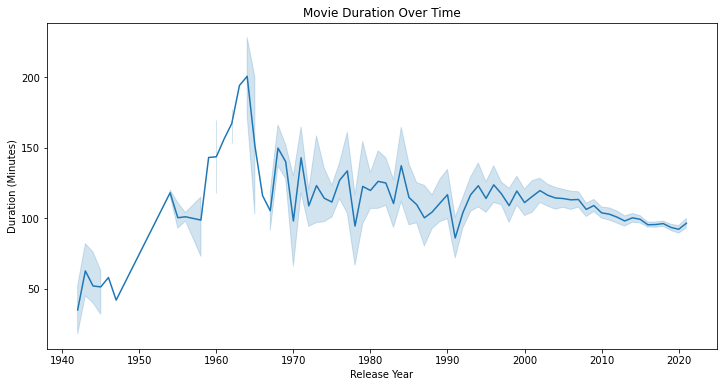

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_netflix_movies, x='release_year', y='duration')
plt.title('Movie Duration Over Time')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()

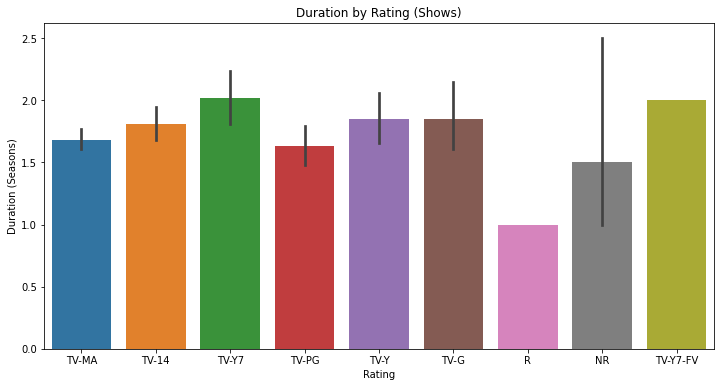

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_netflix_shows, x='rating', y='duration')
plt.title('Duration by Rating (Shows)')
plt.xlabel('Rating')
plt.ylabel('Duration (Seasons)')
plt.show()

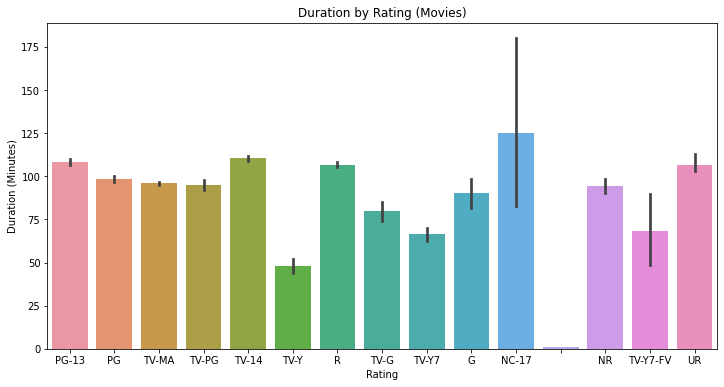

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_netflix_movies, x='rating', y='duration')
plt.title('Duration by Rating (Movies)')
plt.xlabel('Rating')
plt.ylabel('Duration (Minutes)')
plt.show()